In [1]:
!pip install -U scikit-learn

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


In [3]:
df= pd.read_csv("kc_house_data.csv")
df.head()
print(df.shape)
df.head()


(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print("Data types of each column:\n")
print(df.dtypes)

print("\n Summary info:")
df.info()

Data types of each column:

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

 Summary info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64


In [7]:
from sqlalchemy import true


df.drop(["id"],axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
mean= df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean,inplace= True)

mean= df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean,inplace= True)


In [10]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [16]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
# QUESTION 3

# Count houses for each unique value of 'floors'
floors_counts = df['floors'].value_counts().to_frame()

# Give the column a clearer name
floors_counts.rename(columns={'floors': 'count'}, inplace=True)

# Show the result
floors_counts


,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

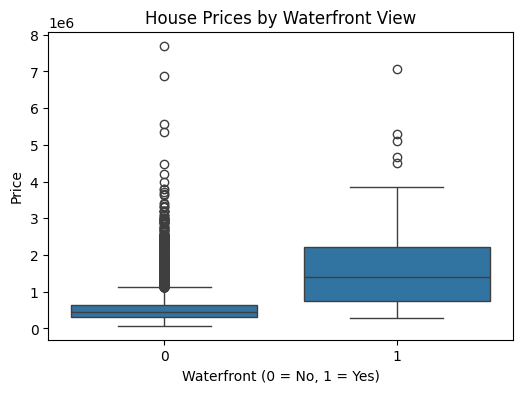

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x='waterfront', y='price',data=df)

plt.title('House Prices by Waterfront View')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price')

plt.show()

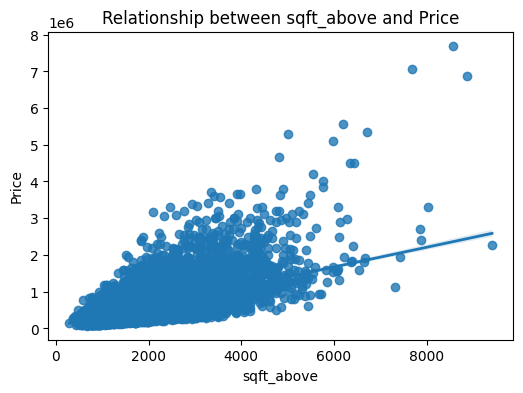

In [22]:
plt.figure(figsize=(6,4))
sns.regplot(x='sqft_above',y='price',data=df, line_kws={'linewidth':2})

plt.title('Relationship between sqft_above and Price')
plt.xlabel('sqft_above')
plt.ylabel('Price')

plt.show()

In [26]:
from sklearn.linear_model import LinearRegression


X= df[['sqft_living']]
Y= df['price']

lm= LinearRegression()
lm.fit(X,Y)
r2_q6= lm.score(X,Y)

print("The r^2 for model using 'sqft_living':", r2_q6)

The r^2 for model using 'sqft_living': 0.4928532179037931


In [29]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     
X= df[features]
Y= df['price']

lm=LinearRegression()
lm.fit(X,Y)
r2_q7= lm.score(X,Y)
print("R^2 for model using multiple features:", r2_q7)

R^2 for model using multiple features: 0.6577151058279322


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above",
            "grade", "sqft_living"]

X = df[features]
Y = df['price']
# Create pipeline with scaling + linear regression
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', LinearRegression())
])


In [33]:
# Fit the model
pipe.fit(X, Y)

# Compute R^2
r2_q8 = pipe.score(X, Y)

print("R^2 using pipeline with multiple features:", r2_q8)



R^2 using pipeline with multiple features: 0.6577151058279325


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [35]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size= 0.15,random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [36]:
from sklearn.linear_model import Ridge
# QUESTION 9

# Create Ridge regression model with alpha = 0.1
ridge_model= Ridge(alpha=0.1)

ridge_model.fit(x_train,y_train)
r2_q10= ridge_model.score(x_test,y_test)
print("R^2 of Ridge regression (alpha = 0.1) on test data:", r2_q10)


R^2 of Ridge regression (alpha = 0.1) on test data: 0.6480374087702245


In [37]:
from sklearn.preprocessing import PolynomialFeatures


In [38]:
# QUESTION 10

# Second-order polynomial transformer
poly2= PolynomialFeatures(degree=2,include_bias=False)

x_train_poly= poly2.fit_transform(x_train)
x_test_poly=poly2.transform(x_test)
# Ridge model with alpha = 0.1
ridge_poly_model = Ridge(alpha=0.1)

# Fit on polynomial training data
ridge_poly_model.fit(x_train_poly, y_train)

# R^2 on polynomial test data
r2_q10 = ridge_poly_model.score(x_test_poly, y_test)
print("R^2 of Ridge regression with degree-2 polynomial (alpha = 0.1):", r2_q10)


R^2 of Ridge regression with degree-2 polynomial (alpha = 0.1): 0.7004432054526186
